In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'Data Sets/Austin Growth 2001-2018.csv'

data = (pd.read_csv(path))

In [3]:
# Make a list of all the industries in the dataframe
industries = []
industries.append(data["Description"].unique())

In [4]:
austin = data.drop(columns=["GeoFips","GeoName","LineCode","2001","2002","2003","2004","2005","2006","2007","2008","2009"])
austin = austin.drop(austin.index[[28]])
n = austin.columns.drop("Description")
austin

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,All industry total,92266233,96340214,99254274,103181110,108459112,116349089,121266147,127337977,134416765
1,Private industries,79047472,83297299,86120209,89856748,95137288,102772030,107325021,113167846,120143613
2,"Agriculture, forestry, fishing and hunting",48455,30780,60176,78511,38964,56228,85658,54296,73134
3,"Mining, quarrying, and oil and gas extraction",811231,1099173,1090154,1018098,1178922,1454393,1303397,1230714,1230727
4,Utilities,725645,756885,792281,637305,664827,740633,727157,631238,(D)
5,Construction,4055938,4033457,4417061,4755765,5054755,5798491,6368921,6790285,7041336
6,Manufacturing,13226412,13904000,12668695,13196141,13268132,14973092,15651783,16757725,17733505
7,Durable goods manufacturing,12140442,12837728,11567345,11799504,11691667,12983886,13997884,14984412,15804048
8,Nondurable goods manufacturing,1089885,1061545,1101350,1396643,1576150,1983783,1660638,1780343,1932575
9,Wholesale trade,10159799,11010524,11846633,11782009,11676600,12891564,13211915,14033724,14005844


In [5]:
# replacing (D) with 0
austin[n] = austin[n].replace("(D)","0")

In [7]:
# Change the years instead of being objects for them to be floats so you can make changes
austin[n] = austin[n].astype("float", errors="ignore")

# add a new column to a dataframe for the % change
austin["Largest"] = ""
austin

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,Largest
0,All industry total,92266233.0,96340214.0,99254274.0,103181110.0,108459112.0,116349089.0,121266147.0,127337977.0,134416765.0,
1,Private industries,79047472.0,83297299.0,86120209.0,89856748.0,95137288.0,102772030.0,107325021.0,113167846.0,120143613.0,
2,"Agriculture, forestry, fishing and hunting",48455.0,30780.0,60176.0,78511.0,38964.0,56228.0,85658.0,54296.0,73134.0,
3,"Mining, quarrying, and oil and gas extraction",811231.0,1099173.0,1090154.0,1018098.0,1178922.0,1454393.0,1303397.0,1230714.0,1230727.0,
4,Utilities,725645.0,756885.0,792281.0,637305.0,664827.0,740633.0,727157.0,631238.0,0.0,
5,Construction,4055938.0,4033457.0,4417061.0,4755765.0,5054755.0,5798491.0,6368921.0,6790285.0,7041336.0,
6,Manufacturing,13226412.0,13904000.0,12668695.0,13196141.0,13268132.0,14973092.0,15651783.0,16757725.0,17733505.0,
7,Durable goods manufacturing,12140442.0,12837728.0,11567345.0,11799504.0,11691667.0,12983886.0,13997884.0,14984412.0,15804048.0,
8,Nondurable goods manufacturing,1089885.0,1061545.0,1101350.0,1396643.0,1576150.0,1983783.0,1660638.0,1780343.0,1932575.0,
9,Wholesale trade,10159799.0,11010524.0,11846633.0,11782009.0,11676600.0,12891564.0,13211915.0,14033724.0,14005844.0,


In [8]:
# get the % change of year 2010 and 2018 to see how much an industry has grown in 8 years
diff = (austin["2018"] - austin["2010"])/austin["2010"]
austin["Largest"] = diff
austin

,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,Largest
0,All industry total,92266233.0,96340214.0,99254274.0,103181110.0,108459112.0,116349089.0,121266147.0,127337977.0,134416765.0,0.456836
1,Private industries,79047472.0,83297299.0,86120209.0,89856748.0,95137288.0,102772030.0,107325021.0,113167846.0,120143613.0,0.519892
2,"Agriculture, forestry, fishing and hunting",48455.0,30780.0,60176.0,78511.0,38964.0,56228.0,85658.0,54296.0,73134.0,0.509318
3,"Mining, quarrying, and oil and gas extraction",811231.0,1099173.0,1090154.0,1018098.0,1178922.0,1454393.0,1303397.0,1230714.0,1230727.0,0.517110
4,Utilities,725645.0,756885.0,792281.0,637305.0,664827.0,740633.0,727157.0,631238.0,0.0,-1.000000
5,Construction,4055938.0,4033457.0,4417061.0,4755765.0,5054755.0,5798491.0,6368921.0,6790285.0,7041336.0,0.736056
6,Manufacturing,13226412.0,13904000.0,12668695.0,13196141.0,13268132.0,14973092.0,15651783.0,16757725.0,17733505.0,0.340765
7,Durable goods manufacturing,12140442.0,12837728.0,11567345.0,11799504.0,11691667.0,12983886.0,13997884.0,14984412.0,15804048.0,0.301769
8,Nondurable goods manufacturing,1089885.0,1061545.0,1101350.0,1396643.0,1576150.0,1983783.0,1660638.0,1780343.0,1932575.0,0.773192
9,Wholesale trade,10159799.0,11010524.0,11846633.0,11782009.0,11676600.0,12891564.0,13211915.0,14033724.0,14005844.0,0.378555


In [9]:
# What industry grew the most from 2010 to 2018
grow = austin[["Description","Largest"]]
grow = grow.dropna()

,Description,Largest
0,All industry total,0.456836
1,Private industries,0.519892
2,"Agriculture, forestry, fishing and hunting",0.509318
3,"Mining, quarrying, and oil and gas extraction",0.517110
4,Utilities,-1.000000
5,Construction,0.736056
6,Manufacturing,0.340765
7,Durable goods manufacturing,0.301769
8,Nondurable goods manufacturing,0.773192
9,Wholesale trade,0.378555


In [20]:
grow = grow.loc[grow['Largest'] != -1.000000]
grow

,Description,Largest
0,All industry total,0.456836
1,Private industries,0.519892
2,"Agriculture, forestry, fishing and hunting",0.509318
3,"Mining, quarrying, and oil and gas extraction",0.517110
5,Construction,0.736056
6,Manufacturing,0.340765
7,Durable goods manufacturing,0.301769
8,Nondurable goods manufacturing,0.773192
9,Wholesale trade,0.378555
10,Retail trade,0.417833


Text(0, 0.5, 'Percentage change')

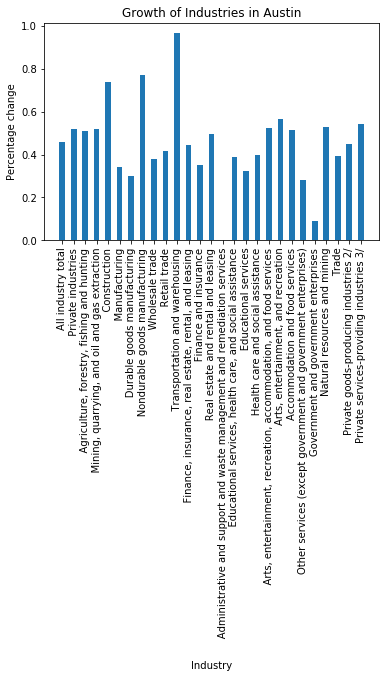

In [21]:
# How much did each industry grew in 8 years

plt.bar(grow["Description"], grow["Largest"], width=.5)
plt.xticks(rotation=90)
plt.title("Growth of Industries in Austin")
plt.xlabel("Industry")
plt.ylabel("Percentage change")